In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the three datasets

In [4]:
df1 = pd.read_table('movies.dat',engine='python',header=None,delimiter='::')#encoding='utf-8', sep= 's\+')

In [5]:
df1.columns = ['movie_id','title','genre'] #columns: movie_id,title,genre
df1.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df2 = pd.read_table('ratings.dat',engine='python',header=None,delimiter='::')
df2.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df2.columns = ['user_id','movie_id','rating','timestamp']

In [8]:
df2.head() #columns: User_id,movie_id,

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df3 = pd.read_table('users.dat',engine='python',header=None,delimiter='::')

In [10]:
df3.columns=['user_id','Gender','age','Occupation','zip-code'] #columns: user_id,Gender,age,Occupation
df3.head()

,user_id,Gender,age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [11]:
print(df1.shape, df2.shape, df3.shape)

(3883, 3) (1000209, 4) (6040, 5)


In [12]:
df4 = pd.merge(df1,df2,how='inner',on='movie_id')
df4.shape

(1000209, 6)

In [13]:
Master_Data = pd.merge(df4,df3,how='inner',on='user_id')

In [14]:
Master_Data.head()

,movie_id,title,genre,user_id,rating,timestamp,Gender,age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
Master_Data_copy = Master_Data.copy()

In [16]:
Master_Data=(Master_Data[['movie_id','title','user_id','age','Gender','Occupation','rating']])
Master_Data.head()

,movie_id,title,user_id,age,Gender,Occupation,rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5


### 1. User age distribution

Text(0, 0.5, 'frequency')

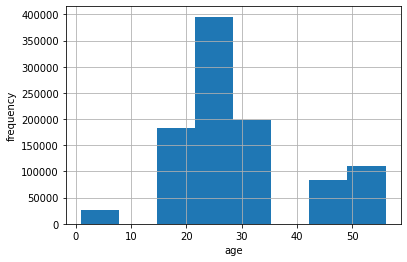

In [17]:
Master_Data['age'].hist(bins=8)
plt.xlabel('age')
plt.ylabel('frequency')

#### INSIGHT: higher number of ratings from the users whose age between 20-30

### 2. User rating of the movie “Toy Story”

In [53]:
Master_Data_toy = Master_Data[Master_Data['title'] == 'Toy Story 2 (1999)'][['title','rating']]
Master_Data_toy
# grouped_by_movieName = Master_Data.groupby('title')['rating']
# grouped_by_movieName
# #grouped_by_movieName.loc['Toy Story 2 (1999)']['rating']

,title,rating
50,Toy Story 2 (1999),4
346,Toy Story 2 (1999),4
715,Toy Story 2 (1999),4
1297,Toy Story 2 (1999),4
1991,Toy Story 2 (1999),3
...,...,...
998988,Toy Story 2 (1999),4
999027,Toy Story 2 (1999),5
999486,Toy Story 2 (1999),4
999869,Toy Story 2 (1999),4


In [56]:
toystory_data = Master_Data[Master_Data.movie_id==1]
toystory_data.groupby('rating').size()

rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [57]:
toystory_data.head(10)

,movie_id,title,user_id,age,Gender,Occupation,rating
0,1,Toy Story (1995),1,1,F,10,5
53,1,Toy Story (1995),6,50,F,9,4
124,1,Toy Story (1995),8,25,M,12,4
263,1,Toy Story (1995),9,25,M,17,5
369,1,Toy Story (1995),10,35,F,1,5
770,1,Toy Story (1995),18,18,F,3,4
1075,1,Toy Story (1995),19,1,M,10,5
1330,1,Toy Story (1995),21,18,M,16,3
1352,1,Toy Story (1995),23,35,M,0,4
1656,1,Toy Story (1995),26,25,M,7,3


(array([ 16.,   0.,  61.,   0.,   0., 345.,   0., 835.,   0., 820.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

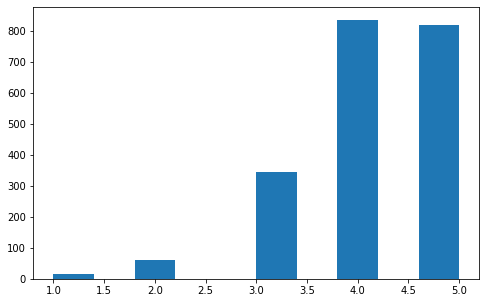

In [58]:
plt.figure(figsize=(8,5))
plt.hist(x=toystory_data['rating'])

#### INSIGHT: Most of the users rated Toy Story between 4-5 rating

### 3. top 25 movies by viewership rating

In [59]:
#Grouping the data by title and taking average of ratings, picking top25 movies based on rating
top_25_rating = Master_Data.groupby('title').mean()['rating'].sort_values(ascending = False,na_position = 'last')[:25]
top_25_rating

title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

<AxesSubplot:xlabel='title'>

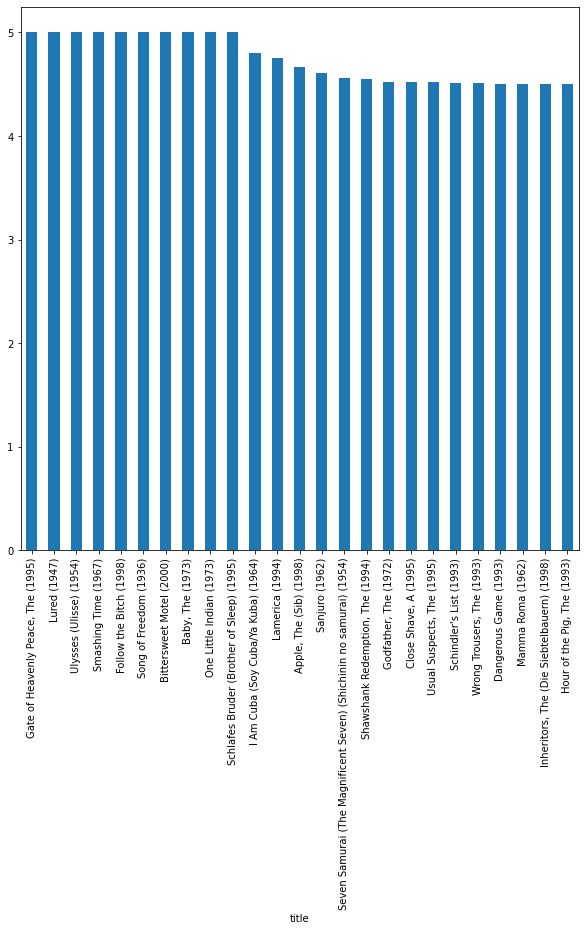

In [60]:
plt.figure(figsize=(10,10))
top_25_rating.plot(kind='bar')

   #### INSIGHT: Gate of Heavenly Peace, The (1995)  is top rated movie

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [19]:
#Method_1
df5=Master_Data.set_index('user_id')
rating_of_2696=df5.loc[2696][['title','rating']]
rating_of_2696

,title,rating
user_id,,
2696,"Client, The (1994)",3
2696,Lone Star (1996),5
2696,Basic Instinct (1992),4
2696,E.T. the Extra-Terrestrial (1982),3
2696,"Shining, The (1980)",4
2696,Back to the Future (1985),2
2696,Cop Land (1997),3
2696,L.A. Confidential (1997),4
2696,"Game, The (1997)",4


<AxesSubplot:xlabel='title'>

<Figure size 720x720 with 0 Axes>

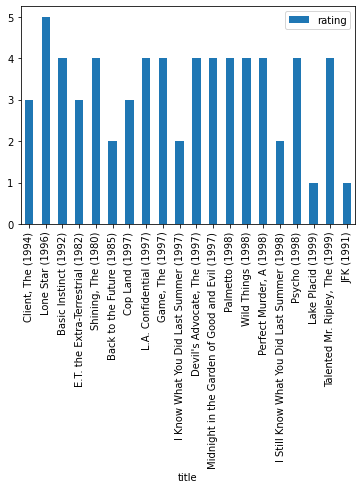

In [20]:
plt.figure(figsize=(10,10))
rating_of_2696.plot(x='title',y='rating',kind='bar')

  ####  INSIGHT: user 2696 rated "Lone Star (1996)" movie with 5 stars

## Feature Engineering

In [21]:
df1

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


#### 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [22]:
one_hot = df1.join(df1['genre'].str.get_dummies('|'))
one_hot.pop('genre')

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: genre, Length: 3883, dtype: object

In [23]:
one_hot

,movie_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### 1. Find out all the unique genres 

In [24]:
list_unique_genre=one_hot.columns.tolist()

In [25]:
list_unique_genre[3:],len(list_unique_genre[3:])

(['Adventure',
  'Animation',
  "Children's",
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Fantasy',
  'Film-Noir',
  'Horror',
  'Musical',
  'Mystery',
  'Romance',
  'Sci-Fi',
  'Thriller',
  'War',
  'Western'],
 17)

 #### INSIGHT: Total there are 17 unique genres are there

### 3. Determine the features affecting the ratings of any particular movie.

In [26]:
Master_Data_copy = Master_Data_copy.join(Master_Data_copy['genre'].str.get_dummies('|'))
Master_Data_copy

,movie_id,title,genre,user_id,rating,timestamp,Gender,age,Occupation,zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [27]:
feature_columns = Master_Data_copy.join(Master_Data_copy['Gender'].str.get_dummies('|'))
feature_columns

,movie_id,title,genre,user_id,rating,timestamp,Gender,age,Occupation,zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,1
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,1,0,0,0,0,1,0,0,0,1
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,1,0,0,0,0,0,1
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,1


In [28]:
df6=feature_columns.drop(['user_id','movie_id','Gender','genre','timestamp','title','zip-code'],axis=1)
df6

,rating,age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,5,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,10,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,10,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4,25,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,2,25,4,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1000206,5,25,4,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1000207,3,25,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
df6.rename(columns={'F':'female','M':'male'}, inplace=True)

In [30]:
df6

,rating,age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,female,male
0,5,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,10,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,10,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4,25,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,2,25,4,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1000206,5,25,4,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1000207,3,25,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
df6['age'] = df6['age'].replace([1,18,25,35,45,50,56],[1,2,3,4,5,6,7])

In [32]:
df6.columns.tolist()

['rating',
 'age',
 'Occupation',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'female',
 'male']

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df6.iloc[:,1:]  #independent columns
y = df6.iloc[:,0]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))

          Specs        Score
9         Drama  9705.111412
12       Horror  9192.490626
18          War  6405.101403
11    Film-Noir  3826.021787
0           age  2176.237571
16       Sci-Fi  1845.628302
2        Action  1734.519208
5    Children's  1596.211623
3     Adventure  1285.004561
6        Comedy  1119.398979
7         Crime  1052.034731
8   Documentary   891.204362
15      Romance   698.862002
1    Occupation   631.872769
10      Fantasy   587.640250


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(700146, 22) (300063, 22) (700146,) (300063,)


In [37]:
rf = RandomForestClassifier(min_samples_split=4,n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rf.feature_importances_

array([0.17829476, 0.50549877, 0.02126342, 0.02217634, 0.01025556,
       0.01414917, 0.02552335, 0.01571806, 0.00333935, 0.02913526,
       0.01170276, 0.01031784, 0.01536804, 0.01228277, 0.0137993 ,
       0.01861627, 0.02283862, 0.02394388, 0.01888198, 0.00913996,
       0.00903425, 0.00872031])

In [39]:
df_fea = pd.DataFrame({'Columns':X.columns,'Feature Imp': rf.feature_importances_})
df_fea = df_fea.sort_values(by='Feature Imp',ascending = False).reset_index(drop=True)
df_fea

,Columns,Feature Imp
0,Occupation,0.505499
1,age,0.178295
2,Drama,0.029135
3,Comedy,0.025523
4,Thriller,0.023944
5,Sci-Fi,0.022839
6,Adventure,0.022176
7,Action,0.021263
8,War,0.018882
9,Romance,0.018616


In [40]:
col_list = list(df_fea['Columns'][:10])

In [41]:
col_list

['Occupation',
 'age',
 'Drama',
 'Comedy',
 'Thriller',
 'Sci-Fi',
 'Adventure',
 'Action',
 'War',
 'Romance']

 These are the top 10 Featutes afecting the rating 

### 4. Develop an appropriate model to predict the movie ratings

In [42]:
X1 = df6.loc[:,col_list]
y1 = df6.iloc[:,0]

In [43]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3)

In [44]:
rf1 = RandomForestClassifier(min_samples_split=4,n_estimators = 100)
rf1.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y1_predict = rf1.predict(X1_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y1_test,y1_predict))
print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test,y1_predict))

0.34996317440004265
[[  153   152  2664 12984   865]
 [  157   337  5063 25268  1701]
 [  212   555 10711 62315  4480]
 [  191   485 10592 85662  7715]
 [  122   216  5191 54124  8148]]
              precision    recall  f1-score   support

           1       0.18      0.01      0.02     16818
           2       0.19      0.01      0.02     32526
           3       0.31      0.14      0.19     78273
           4       0.36      0.82      0.50    104645
           5       0.36      0.12      0.18     67801

    accuracy                           0.35    300063
   macro avg       0.28      0.22      0.18    300063
weighted avg       0.32      0.35      0.27    300063



#### INSIGHT: Model not able to classify the ratings since the provided variables are not sufficient; Need some other important features which classify the ratings